## Metis ML Classification Project

Chaya Wurman

Goal: Given the CDC NHANES (National Health and Nutrition Examination Survey) data,
can we predict if a patient has had a stroke. Strokes are caused by many medical and
lifestyle factors, and knowing which factors are highly correlated with strokes can
help better predict those who are at higher risk and help mitigate the risk before
a potential life-threatening event happens.

This notebook contains the final models using logistic regression & scoring for our goal!

In [2]:
# Import all our necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, roc_curve, auc

x = 5

In [3]:
# Load all the data
data = pd.read_csv("data_feature_engineered.csv")
# drop the first col from the csv
data = data.iloc[: , 1:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   chest_pain                                  5583 non-null   float64
 1   high_blood_pressure_diagnosed               5583 non-null   float64
 2   high_blood_cholesterol                      5583 non-null   float64
 3   overweight_diagnosed                        5583 non-null   float64
 4   coronary_heart_disease                      5583 non-null   float64
 5   LABEL_had_stroke                            5583 non-null   float64
 6   diabetes_diagnosed                          5583 non-null   float64
 7   diabetes_high_blood_sugar_but_not_diabetes  5583 non-null   float64
 8   smoking_smoked_at_least_100_cigarettes      5583 non-null   float64
 9   income_family_monthly                       5583 non-null   float64
 10  alcohol_use_

In [4]:
# Trees will require our data to be label encoded

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["marital_status"] = encoder.fit_transform(data["marital_status"])
data["race"] = encoder.fit_transform(data["race"])

In [5]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "LABEL_had_stroke"]
y = data.LABEL_had_stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



In [6]:
# Use SMOTENC since we have categorical and
from imblearn.over_sampling import SMOTENC

categorial_indices = [0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 14, 15, 18]
smote_nc = SMOTENC(categorical_features=categorial_indices, random_state=0)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)



Metrics for Logistic Regression
  - Accuracy: 0.7869292748433303
  - Recall: 0.5609756097560976
  - Precision: 0.09465020576131687
  - F1 Score: 0.1619718309859155
  - AUC: 0.6782573216066733


/Users/chaya.wurman/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


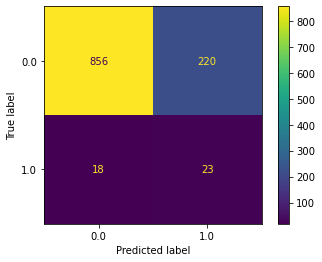

In [7]:
logreg = LogisticRegression(max_iter=50)
logreg.fit(X_train, y_train)

from sklearn.metrics import recall_score, accuracy_score, precision_score, roc_curve, auc, f1_score

def print_basic_metrics(model_name, y_true, y_pred):
    print(f"Metrics for {model_name}")
    print(f"  - Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"  - Recall: {recall_score(y_true, y_pred)}")
    print(f"  - Precision: {precision_score(y_true, y_pred)}")
    print(f"  - F1 Score: {f1_score(y_true, y_pred)}")
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    print(f"  - AUC: {auc(fpr, tpr)}")

print_basic_metrics("Logistic Regression", y_test, logreg.predict(X_test))

"""
Metrics for Linear Regression
  - Accuracy: 0.7869292748433303
  - Recall: 0.5609756097560976
  - Precision: 0.09465020576131687
  - F1 Score: 0.1619718309859155
  - AUC: 0.6782573216066733
"""
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

# Realistically, we should probably filter some of these down
# So, find which are our best features

In [8]:
# Train a simple model to test


# For tuning, see what happens if we only train on a subset of data
# and see what's the highest accuracy we can get
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def findsubsets(s, n):
    return list(combinations(s, n))

from sklearn.metrics import f1_score, recall_score
all_columns_subset = findsubsets(X_train.columns, 3)
print(len(all_columns_subset))
all_recall_scores = []
all_f1_scores = []
for features_to_include in all_columns_subset:
    X_train_subset = X_train[list(features_to_include)]
    X_test_subset = X_test[list(features_to_include)]

    logreg = LogisticRegression(max_iter=50)
    logreg.fit(X_train_subset, y_train)

    y_predict = logreg.predict(X_test_subset)
    all_recall_scores.append(recall_score(y_test, y_predict))
    all_f1_scores.append(f1_score(y_test, y_predict))

features_data_frame = pd.DataFrame({"features": all_columns_subset,
                                    "recall": all_recall_scores,
                                    "f1": all_f1_scores})

969


/Users/chaya.wurman/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chaya.wurman/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [9]:
# Find some info about whats our most important features
# Let's at least require that our f1 score is higher than with 0.16, what we got while using all features
decent_features = features_data_frame[features_data_frame.f1 >= 0.16]
best_3_features = decent_features.nlargest(10, "recall")
print(best_3_features)


# What happens if we try to just train on all the best features from this list
all_best_features = set()
for i, row in best_3_features.iterrows():
    all_best_features = all_best_features.union(set(row["features"]))

print(all_best_features)

# From here, we see that some of our most important features are:
# {'coronary_heart_disease', 'age_years', 'highest_education_level', 'gender', 'overweight_diagnosed', 'diet_is_on', 'diabetes_high_blood_sugar_but_not_diabetes', 'marital_status', 'weight_kg'}
# This gives us ~9 features that we should drill down on

                                              features    recall        f1
939  (age_years, highest_education_level, marital_s...  0.853659  0.175879
494  (overweight_diagnosed, age_years, highest_educ...  0.829268  0.170854
729  (diabetes_high_blood_sugar_but_not_diabetes, a...  0.829268  0.176623
865  (alcohol_use_more_than_12_drinks_per_year, age...  0.829268  0.171717
914       (gender, age_years, highest_education_level)  0.829268  0.175258
585  (coronary_heart_disease, age_years, highest_ed...  0.804878  0.167939
941    (age_years, highest_education_level, height_cm)  0.804878  0.166667
942   (age_years, highest_education_level, diet_is_on)  0.804878  0.167089
389  (high_blood_cholesterol, age_years, highest_ed...  0.780488  0.162437
916                     (gender, age_years, weight_kg)  0.780488  0.161209
{'age_years', 'diabetes_high_blood_sugar_but_not_diabetes', 'marital_status', 'gender', 'weight_kg', 'diet_is_on', 'highest_education_level', 'overweight_diagnosed', 'high_blo

Metrics for LogReg using best features we could find
  - Accuracy: 0.6982990152193375
  - Recall: 0.7804878048780488
  - Precision: 0.08888888888888889
  - F1 Score: 0.1596009975062344
  - AUC: 0.7378275455617009


/Users/chaya.wurman/miniconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


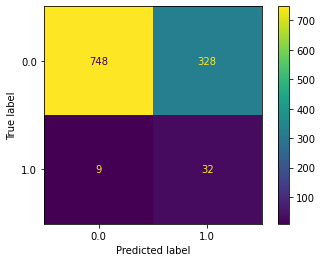

In [41]:
# and score it
best_features = list(all_best_features)
logreg_best_features = LogisticRegression()
X_train_best_features = X_train[list(best_features)]
X_test_best_features = X_test[list(best_features)]
logreg_best_features.fit(X_train_best_features, y_train)

print_basic_metrics("LogReg using best features we could find", y_test, logreg_best_features.predict(X_test_best_features))


# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg_best_features, X_test_best_features, y_test)


Feature age_years, Score 0.07533871797492106
Feature coronary_heart_disease, Score -0.17962784125212042
Feature highest_education_level, Score -0.2951968319770132
Feature overweight_diagnosed, Score 0.08003983109851867
Feature gender, Score 0.08479670823280537
Feature high_blood_cholesterol, Score -0.7187588116485378
Feature diet_is_on, Score -0.028130251160874517
Feature alcohol_use_more_than_12_drinks_per_year, Score -0.34808061584090133
Feature diabetes_high_blood_sugar_but_not_diabetes, Score 1.1017322218968904
Feature marital_status, Score -0.15676907486876032
Feature weight_kg, Score 0.005396192781114532
Feature height_cm, Score -0.022577235010385534


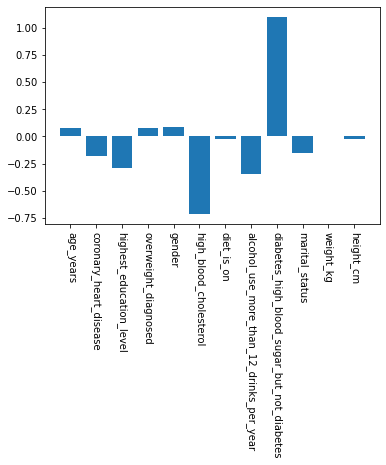

In [49]:
# Lastly, get the coefficients for all these so we can have a ranked list of the most important
importance = logreg_best_features.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature {best_features[i]}, Score {importance[i]}")
# plot feature importance
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), best_features, rotation=-90)
plt.show()
